### Loading data binaries

In [1]:
import sys

sys.path.insert(1, "/home/vinicius/storage1/projects/vanderbilt")

In [2]:
import os

import h5py
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [3]:
from VUDA.io.loadbinary import LoadBinary

In [4]:
ROOT = os.path.expanduser("~/funcog/Neural Data/FN - LaDy/10-15-2022")

In [5]:
filepath = os.path.join(ROOT, "aHPC_B_cnct.dat")
tspath = os.path.join(ROOT, "timestamps.mat")

In [6]:
# aHPC_B_cnct.dat - includes CA1
# pHPC - posterior HIPPOCMAPUS

#### Plot load binary function docstring

In [7]:
perpl_LoadBinary?

Object `perpl_LoadBinary` not found.


#### Load data

In [8]:
data = LoadBinary(
    filepath,
    frequency=30000,
    nSamplesPerChannel=3000,
    channels=None,
    downsample=1,
    bitVolts=0.195,
    nChannels=64,
    precision=np.int16,
    verbose=False,
)

In [9]:
print(data)
print(data.shape)

<xarray.DataArray (times: 3000, channels: 64)>
array([[-22.62 , 108.42 ,  76.635, ...,  31.005, -20.865,  10.335],
       [-24.18 , 108.03 ,  77.415, ...,  31.785, -20.67 ,   9.945],
       [-17.55 , 107.64 ,  86.19 , ...,  32.37 , -19.5  ,  12.09 ],
       ...,
       [ 46.215,  71.955,  94.965, ...,  10.14 ,  -3.12 ,   4.485],
       [ 31.98 ,  71.76 ,  86.97 , ...,  -1.755,  -2.34 ,  -8.775],
       [ 23.595,  71.565,  83.265, ..., -13.065,   0.78 , -15.99 ]])
Coordinates:
  * channels  (channels) int64 1 2 3 4 5 6 7 8 9 ... 56 57 58 59 60 61 62 63 64
Dimensions without coordinates: times
(3000, 64)


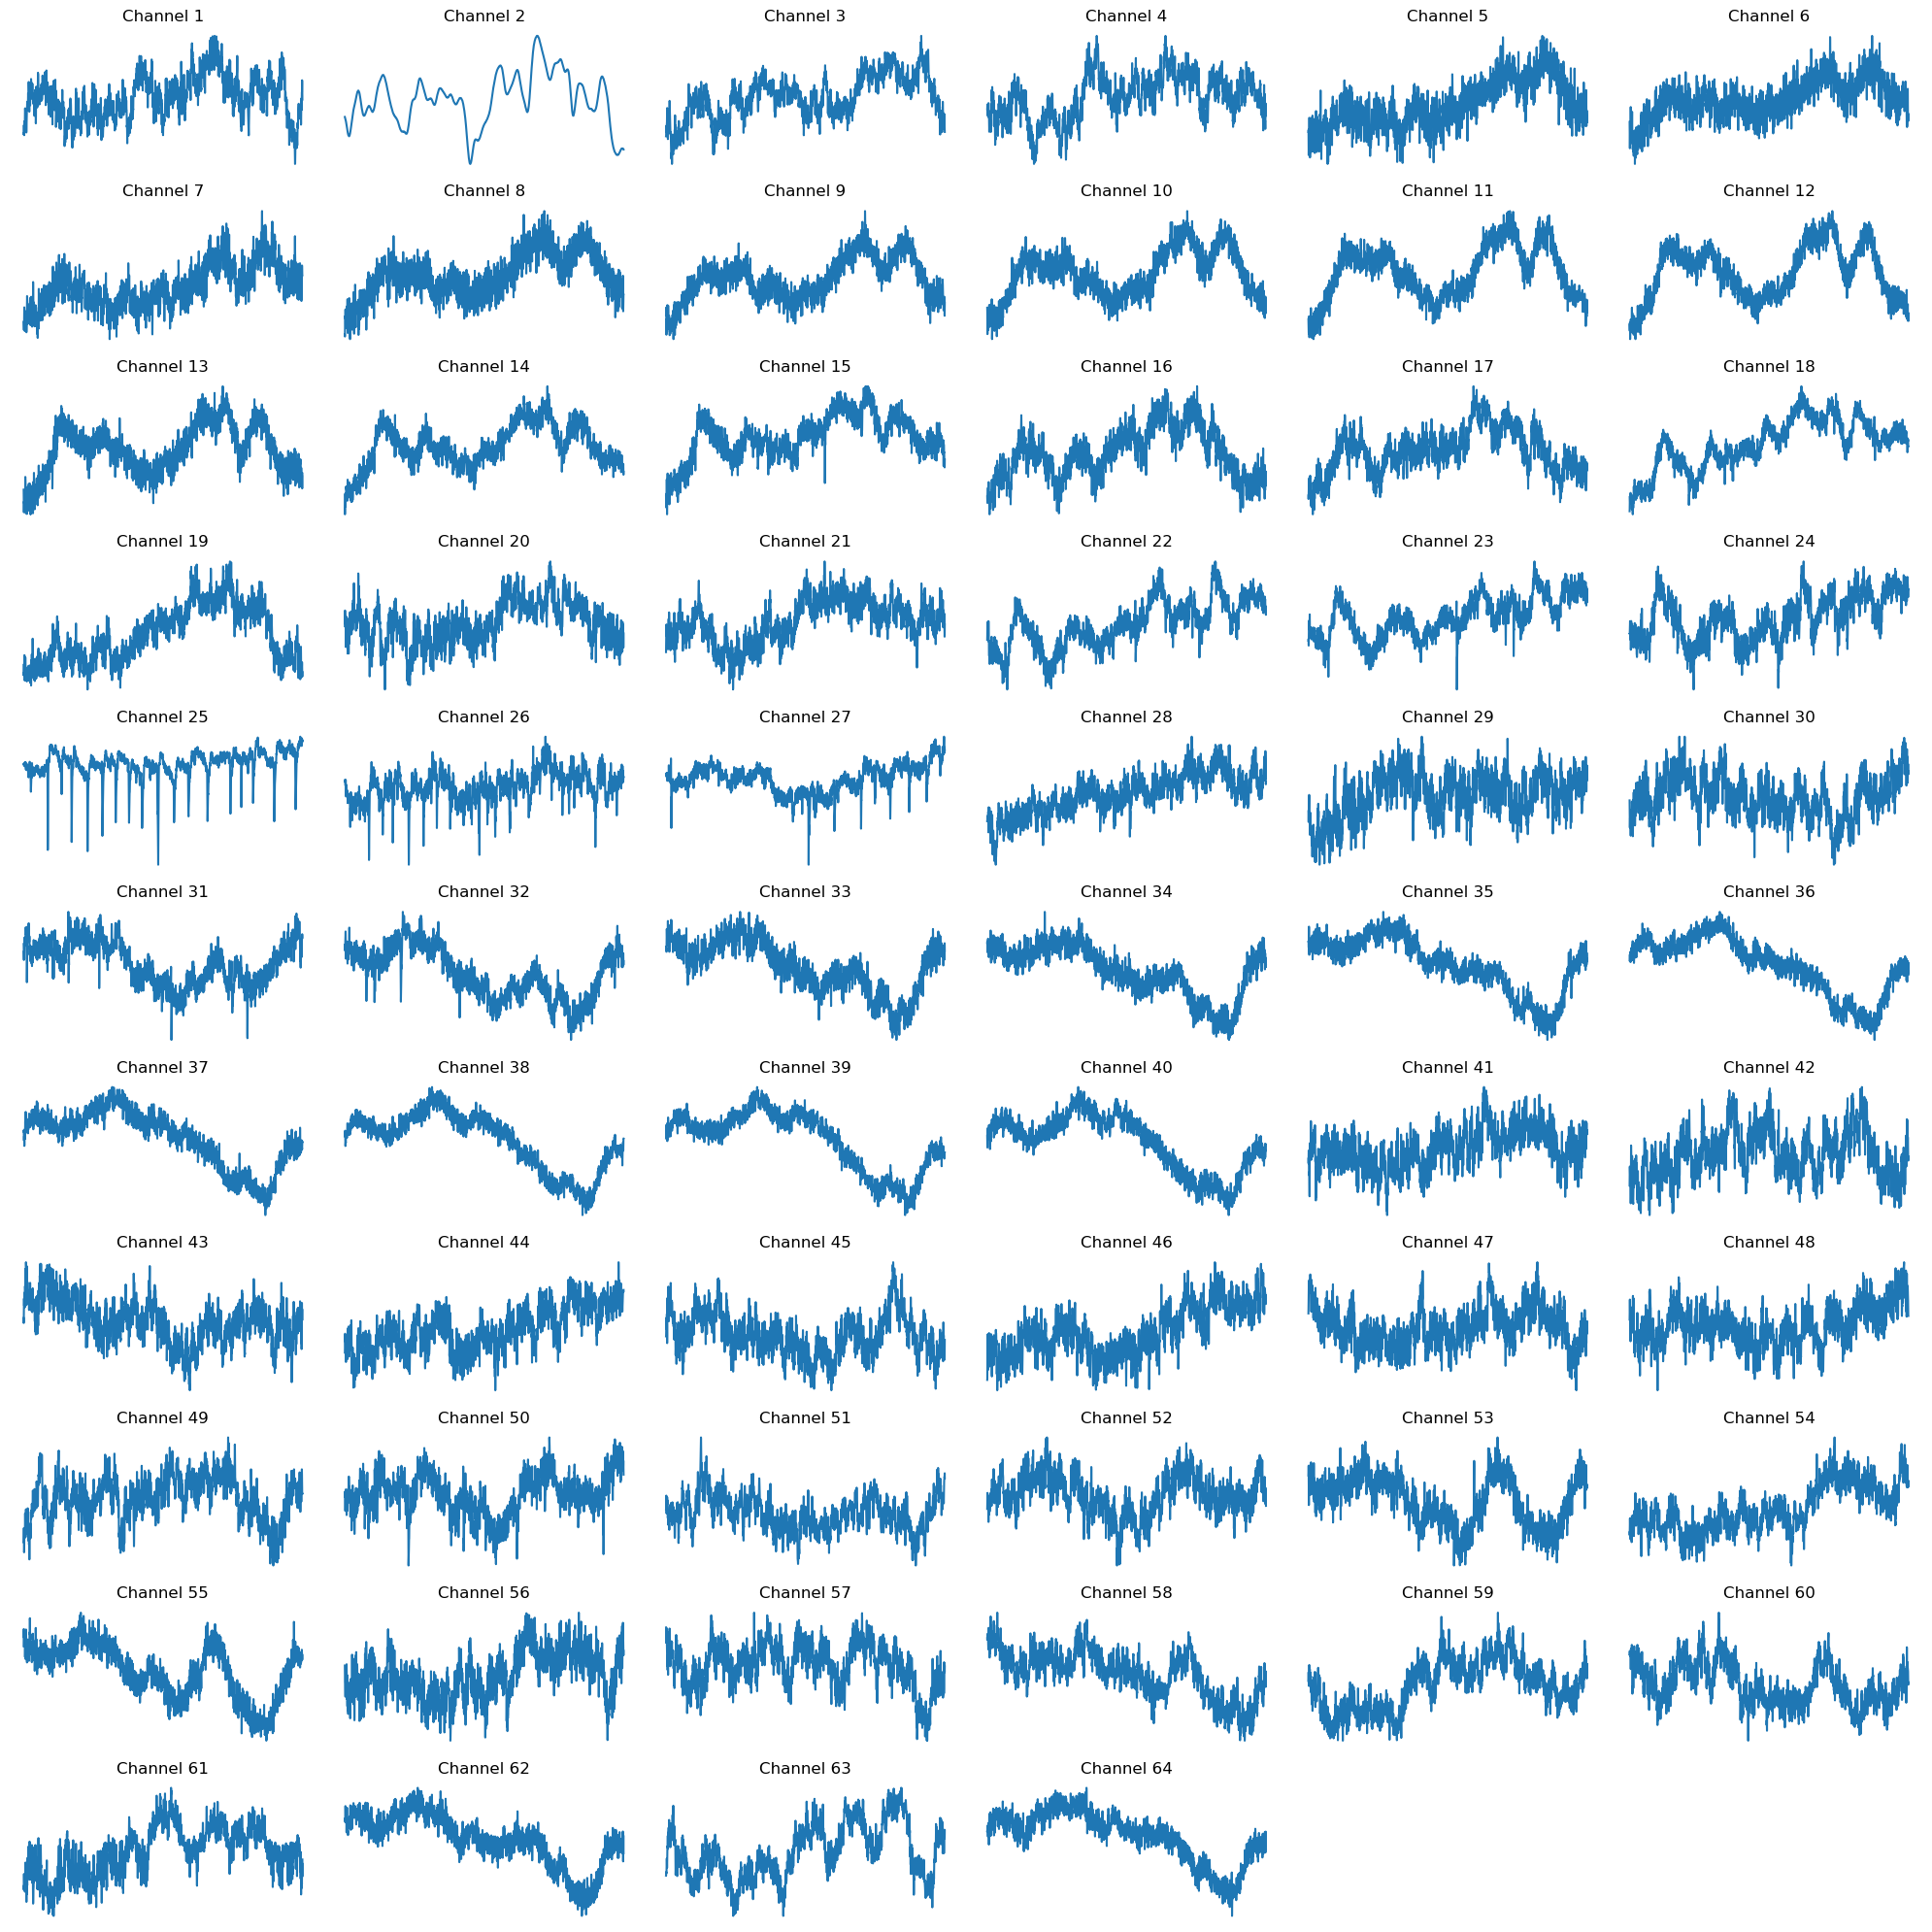

In [10]:
plt.figure(figsize=(20, 20))
for i in range(data.shape[1]):
    plt.subplot(11, 6, i + 1)
    plt.plot(data[:, i])
    plt.title(f"Channel {i + 1}")
    plt.axis("off")
plt.tight_layout()

#### Save data for different parameters to compare with Matlab version

In [11]:
downsample = [1, 10, 20]
channels = [1, 5, 10, 23, 55]

#### Different sample sizes

#### Different durations (in seconds)

### Using Data Loader to load and preprocess raw data

In [12]:
from VUDA.io.dataloader import DataLoader

In [13]:
DataLoader?

Init signature: DataLoader(filename: str, rec_info: str) -> None
Docstring:     
Load and preprocess data.

Parameters
----------
filename : str
    The path to the data file.
rec_info : str
    The path to the recording information file.
data : xr.DataArray
    The loaded data (initialized as None).
fsample : int
    The sample frequency (initialized as None).
File:           ~/storage1/projects/vanderbilt/VUDA/io/dataloader.py
Type:           type
Subclasses:     

In [14]:
rec_info = os.path.expanduser(
    "/home/vinicius/storage1/projects/vanderbilt/recording_params.json"
)

In [15]:
loader = DataLoader(filepath, rec_info)

In [16]:
loader.loadbinary(nSamplesPerChannel=100000, downsample=30, verbose=True)

INFO:root:Loading binaries from /home/vinicius/funcog/Neural Data/FN - LaDy/10-15-2022/aHPC_B_cnct.dat with:
fsample = 30000, start = 0, duration = None, offset = 0, nSamplesPerChannel = 100000, nChannels = 64, precision = <class 'numpy.int16'>, downsample = 30, bitVolts = 0.195.
Loading batches: 20/21: 100%|████████████████████████████████| 21/21 [00:00<00:00, 112.22it/s]


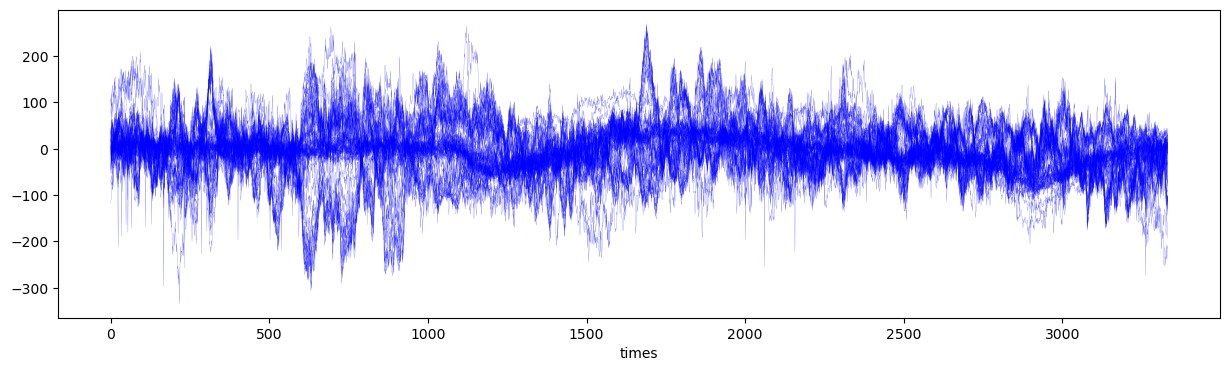

In [18]:
plt.figure(figsize=(15, 4))
loader.data.plot(hue="channels", color="b", lw=0.1)
plt.legend([], frameon=False)

In [19]:
loader.filter(0, 120, {})

Setting up low-pass filter at 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 111 samples (0.111 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


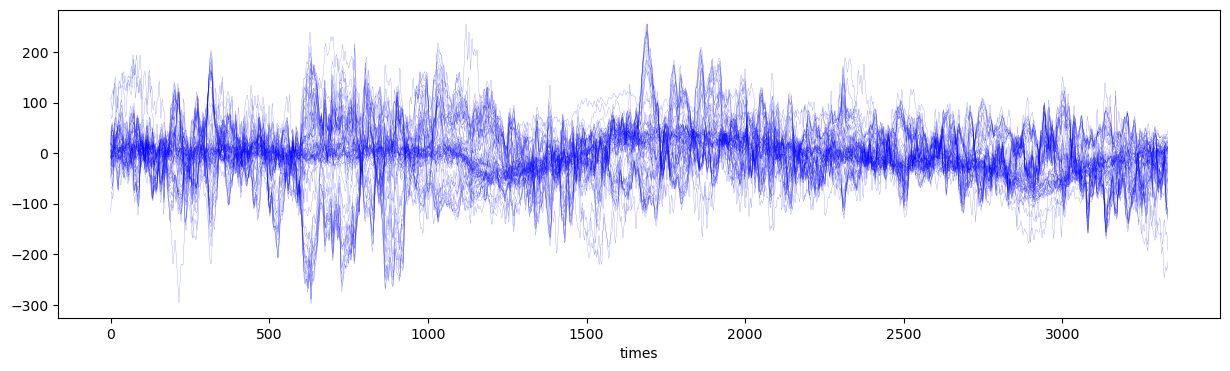

In [20]:
plt.figure(figsize=(15, 4))
loader.data.plot(hue="channels", color="b", lw=0.1)
plt.legend([], frameon=False)

### Saving annotated dataset

In [21]:
import pandas as pd

from config import metadata

In [22]:
date = "10-20-2022"
monkey = "FN"

In [23]:
ROOT = os.path.expanduser(f"~/funcog/Neural Data/{monkey} - LaDy/{date}")
filepath = os.path.join(ROOT, "aHPC_B_cnct.dat")
tspath = os.path.join(ROOT, "timestamps.mat")

In [24]:
info = pd.read_excel(metadata["rec_info"])

In [25]:
info.columns

Index(['Date', 'Animal_ID', 'directory', 'RSC_Concatenated',
       'aHPC_B_Concatenated', 'TH converted', 'TH_start', 'TH_end',
       'TH_errors', 'Sleep converted', 'Sleep_start', 'Sleep_end',
       'Sleep_errors', 'Probe-type', 'Num_chan', 'Bad Channels',
       'Spindle_Chan', 'Ripple_Chan_TH', 'Ripple_Chan_Sleep', 'Reversal_Chan',
       'Pos_Pol_Chan', 'PPC_backup_chan', 'Noise_Chan', 'Ripple_detected',
       'Ripple_Curated', 'Spindle_detected', 'SO_detected', 'FOOOF',
       'SS_method', 'Automated Spike sorting', 'SS Manual', 'Comments'],
      dtype='object')

In [26]:
attrs =  info.loc[np.logical_and(info.Date == date, info.Animal_ID == "FN")]

In [29]:
attrs_dict = attrs.to_dict()

In [28]:
_sel_attrs = np.array(
    [
        "TH_end",
        "Sleep_start",
        "Sleep_errors",
        "Bad Channels",
        "Spindle_Chan",
        "Ripple_Chan_TH",
        "Ripple_Chan_Sleep",
        "Reversal_Chan",
        "Pos_Pol_Chan",
        "Noise_Chan",
        "Ripple_detected",
        "Spindle_detected",
        "SO_detected",
    ]
)

In [36]:
values = []
for _sel_attr in _sel_attrs:
    for key in attrs_dict[_sel_attr].keys():
        values += [ attrs_dict[_sel_attr][key] ]
attrs_dict = dict(zip(_sel_attrs, values))

In [37]:
attrs_dict

{'TH_end': '146619647, 1.666283622965538e+09',
 'Sleep_start': '1, 1.666285370168010e+09',
 'Sleep_errors': 0.0,
 'Bad Channels': nan,
 'Spindle_Chan': '[36, 37, 38, 39, 40]',
 'Ripple_Chan_TH': 23,
 'Ripple_Chan_Sleep': 23,
 'Reversal_Chan': 26,
 'Pos_Pol_Chan': 31,
 'Noise_Chan': 1,
 'Ripple_detected': 1,
 'Spindle_detected': 1,
 'SO_detected': 1}

In [37]:
n_channels = attrs["Num_chan"].values[0]

In [38]:
timestamps = np.asarray(h5py.File(tspath).get("timestamps")).squeeze()

64

In [40]:
data = LoadBinary(
    filepath,
    frequency=30000,
    nSamplesPerChannel=np.inf,
    channels=[0],
    downsample=30,
    bitVolts=0.195,
    nChannels=n_channels,
    precision=np.int16,
    timestamps=timestamps,
    attrs=attrs.to_dict(),
    verbose=False,
)

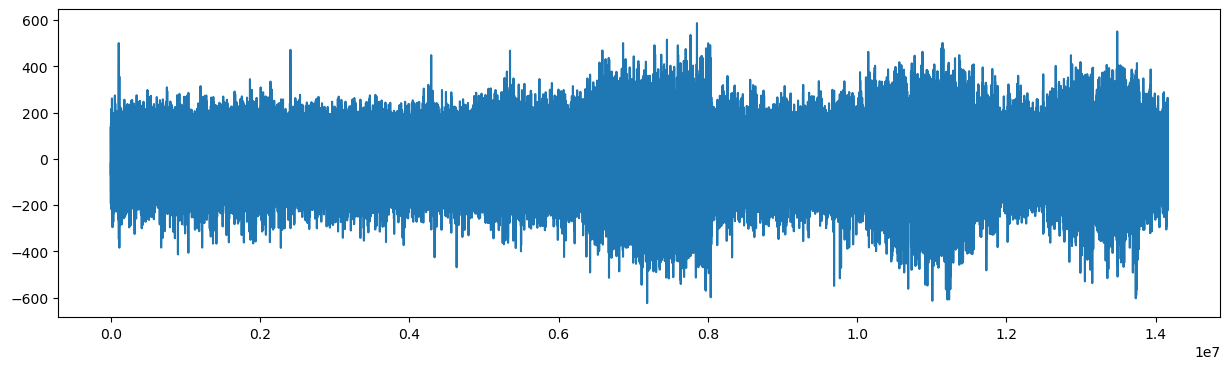

In [41]:
plt.figure(figsize=(15, 4))
plt.plot(data.squeeze())

In [1]:
data

NameError: name 'data' is not defined

In [61]:
data.shape

(14160578, 1)

In [63]:
timestamps[::30].shape

(14160579,)

In [26]:
metadata = {}
metadata["rec_info"] = r"/home/vinicius/funcog/Neural\ Data/Data_Processed.xlsx"
metadata["monkey"] = ["FN - LaDy" :  {}, "WI - LaDy" :  {}]
metadata["monkey"] = {"FN - LaDy": {}, "WI - LaDy": {}}

SyntaxError: invalid syntax (789124437.py, line 3)

In [80]:
import jax
import jax.numpy as jnp
from jax import lax


def set_values_scan(carry, element):
    # `carry` represents the state of the computation, and `element` is the current array element.
    array, value_to_set = carry

    # Update the array by setting its values.
    updated_array = lax.dynamic_update_slice(array, value_to_set, [element])

    # Update the state for the next iteration.
    new_carry = (updated_array, value_to_set)

    return new_carry, None


def set_values_loop(array, values_to_set):
    # Initialize the state for the scan operation.
    initial_carry = (array, values_to_set)

    # Perform the scan operation using jax.lax.scan.
    final_carry, _ = lax.scan(set_values_scan, initial_carry, jnp.arange(array.size))

    # The updated array is the final state of the computation.
    updated_array, _ = final_carry

    return updated_array


# Example usage:
array_size = 5
initial_array = jnp.zeros(array_size)
values_to_set = jnp.array([1.0, 2.0, 3.0, 4.0, 5.0])

result = set_values_loop(initial_array, values_to_set)
print(result)

[1. 2. 3. 4. 5.]


In [88]:
import jax
import jax.numpy as jnp
from jax import lax


def update_matrix_slices(matrix, values, row_indices, col_indices):
    # Update the matrix by setting the specified slices to the given values.
    updated_matrix = lax.dynamic_update_slice(
        matrix, values, [row_indices, col_indices]
    )
    return updated_matrix


# Example usage:
n = 5
matrix = jnp.zeros((n, n))  # Initialize a square matrix with zeros
values_to_set = jnp.array(
    [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]
)  # Values to set in the matrix
row_indices = 2  # Row index to start updating from
col_indices = jnp.array([1, 2, 3])  # Column indices to update

updated_matrix = update_matrix_slices(matrix, values_to_set, row_indices, col_indices)
print(updated_matrix)

TypeError: start_indices arguments to dynamic_update_slice must be scalars, got indices (ShapedArray(int32[]), ShapedArray(int32[3]))

In [90]:
import jax
import jax.numpy as jnp


"""
Basically jax.lax.scan is a for loop that takes as an input the function to be
iterated, the initial value and the iterable. Every loop in python mainly
consist into two possibilities:
1) You prepare an empty variable and you perform inplace modifications
2) You want to perform different computations for each iteration

The function should have two ouputs:

The first one is called the "carry over" because it is passed to the next
iteration. The second one is the actual output of the function at step k.

-------------------------------------------------------------------------------

Imagin that you want to do an incremental update of a variable x. In that case,
you can start from an initial value x0 and add a value at each iteration k. In
that case, this is the "carry over" variable that is going to be updated.

For example:
x = np.array([1, 2, 3])
for k in range(2, 5):
    x += k
"""


def fcn(x, xs):
    """Body function to perform in the loop.

    We update the carry over and we don't care about the second one
    """
    return x + xs, None


out = jax.lax.scan(fcn, jnp.array([1, 2, 3]), jnp.arange(2, 5))
print(out)

(Array([10, 11, 12], dtype=int32), None)


In [105]:
"""
-------------------------------------------------------------------------------
In the second example, I'm not interested in the carry over but I want to
perform a different computation at each iteration.


Example :
out = np.zeros((10,))
for k in range(10):
    out[k] = x.sum() + k
"""


def fcn(x, xs):
    """Body function to perform in the loop.

    First output: leave x unchanged
    Second output: the value computed at step k
    """
    x_sum = x.sum()
    return x, x_sum + xs


x = jnp.array([1, 2, 3])
vec = jnp.arange(10)
out = jax.lax.scan(fcn, x, vec)
print(out)

(Array([1, 2, 3], dtype=int32), Array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15], dtype=int32))


In [120]:
"""
-------------------------------------------------------------------------------
And finally you can combine the two :

t = np.array([0, 0, 0])
for k in range(10):
    t += x.sum() + k
"""


def fcn(inputs, xs):
    """Body function to perform in the loop.

    First output: x unchanged but t is updated
    Second output: the value of the sum of x at step k
    """
    x, t = inputs
    t += x.sum() + xs
    return (x, t), x.sum() + xs


t = jnp.array([0, 0, 0])
x = jnp.array([1, 2, 3])
vec = jnp.arange(10)
out = jax.lax.scan(fcn, (x, t), vec)
print(out)

((Array([1, 2, 3], dtype=int32), Array([105, 105, 105], dtype=int32)), Array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15], dtype=int32))


In [123]:
out[1]

Array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15], dtype=int32)

In [142]:
x = jnp.zeros((2, 100))

In [128]:
jax.lax.dynamic_update_slice(x, jnp.array([2, 3, 4]), jnp.array([1, 1, 1]))

ValueError: Length of slice indices must match number of operand dimensions (3 vs (100,))

In [138]:
x = x.at[0, 2:10].set(1)

In [149]:
def fcn(inputs, xs):
    A, h = inputs

    A = A.at[xs, xs - 1 : xs + 2].set([h[xs - 1], 2 * (h[xs - 1] + h[xs]), h[xs]])

    return (A, h), None

In [153]:
def fcn(inputs, xs):
    A, h = inputs

    # A = A.at[xs, xs - 1 : xs + 2].set([h[xs - 1], 2 * (h[xs - 1] + h[xs]), h[xs]])

    A = jax.lax.dynamic_update_slice(
        A, ((xs), (xs - 1, xs, xs + 1)), [h[xs - 1], 2 * (h[xs - 1] + h[xs]), h[xs]]
    )
    return (A, h), None


x = jnp.zeros((10, 10))
h = jnp.ones(10)

In [167]:
import jax
import jax.numpy as jnp
from jax import lax


def fcn(inputs, xs):
    A, h = inputs

    # Construct the update values as a flat 1D array
    update_values = jnp.array(
        [h[xs - 1], 2 * (h[xs - 1] + h[xs]), h[xs]], dtype=jnp.float32
    )

    # Specify the slice indices
    row_indices = xs
    col_indices = (xs - 1, xs, xs + 1)

    # Use lax.dynamic_update_slice to update A
    A = jax.lax.dynamic_update_slice(A, update_values, (row_indices, col_indices))

    return (A, h), None


# Example usage
x = jnp.zeros((10, 10), dtype=jnp.float32)
h = jnp.ones(10, jnp.float32)

result, _ = fcn((x, h), jnp.array(5, dtype=np.int8))
print(result[0])

TypeError: Cannot determine dtype of (Array(4, dtype=int8), Array(5, dtype=int8), Array(6, dtype=int8))

In [177]:
import jax
import jax.numpy as np
from jax import lax


def simple_while_loop(cond_fun, body_fun, init_val):
    def loop_body(carry):
        val, cond = carry
        next_val = body_fun(val)
        return next_val, cond_fun(next_val)

    final_val, _ = lax.while_loop(
        lambda carry: carry[1], loop_body, (init_val, cond_fun(init_val))
    )
    return final_val


# Example: Compute the sum of squares until the sum exceeds 100
def condition(x):
    return np.sum(x**2) < 100


def body(x):
    return x + 1


initial_value = np.zeros(1)
result = simple_while_loop(condition, body, initial_value)

print("Result:", result)

Result: [[8. 8.]]


In [287]:
def EMD(X, t, max_IMF=jnp.inf):

    x = X.copy()
    IMFs = []
    nIMFs = 0

    def condition(x):
        return x > 0.3

    idx_max = None
    idx_min = None

    def body_fun(values):
        h, t, SD = values

        nonlocal idx_max, idx_min
        idx_max = _boolrelextrema_scan_greater(h)[0]
        idx_min = _boolrelextrema_scan_lesser(h)[0]

        if idx_max.shape[0] + idx_min.shape[0] < 2:
            return -1, -1, -1

        U = cubic_spline_eval(
            t, t[idx_max], *cubic_spline_interpolation(t[idx_max], h[idx_max])
        )
        L = cubic_spline_eval(
            t, t[idx_min], *cubic_spline_interpolation(t[idx_min], h[idx_min])
        )
        m = (U + L) / 2

        prevh = h.copy()
        h = h - m

        SD = jnp.sum(((prevh - h) ** 2) / (prevh**2 + 1e-6))

        return h, t, SD

    def _while(cond_fun, body_fun, init_val):
        h, t, SD = init_val

        def loop_body(carry):
            val, cond = carry
            if not cond:
                return val, False  # Break the loop if the condition is not met
            h, t, SD = body_fun(val)
            return (h, t, SD), cond_fun(SD)

        final_val, _ = jax.lax.while_loop(
            lambda carry: carry[1], loop_body, ((h, t, SD), cond_fun(SD))
        )
        return final_val

    while True:

        h = x.copy()
        SD = 1

        h, t, SD = _while(condition, body_fun, (h, t, SD))

        IMFs += [h]
        nIMFs += 1
        x = x - h

        if idx_max.shape[0] + idx_min.shape[0] < 2:
            break

    return IMFs

In [288]:
t = jnp.linspace(0, 0.2, 100)
x = (
    jnp.sin(2 * jnp.pi * 3 * t)
    + jnp.sin(2 * jnp.pi * 10 * t)
    + jnp.sin(2 * jnp.pi * 60 * t)
    + 0.5 * jnp.sin(2 * jnp.pi * 120 * t)
)

In [289]:
IMFs = EMD(x, t, max_IMF=jnp.inf)

TracerBoolConversionError: Attempted boolean conversion of traced array with shape bool[]..
The error occurred while tracing the function loop_body at /tmp/ipykernel_790700/2746165741.py:41 for while_loop. This concrete value was not available in Python because it depends on the value of the argument carry[1].
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerBoolConversionError

In [275]:
IMFs

[]

In [291]:
def fcn(inputs, xs):
    A, h = inputs

    # Construct the update values as a flat 1D array
    update_values = jnp.c_[(h[xs - 1], 2 * (h[xs - 1] + h[xs]), h[xs])].reshape(1, -1)

    # Use lax.dynamic_update_slice to update A
    A = lax.dynamic_update_slice(A, update_values, (xs, xs - 1))

    return (A, h), None


# Example usage
x = jnp.zeros((10, 10))
h = jnp.ones((10,))

result, _ = fcn((x, h), 5)
print(result[0])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 4. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [292]:
import jax
import jax.numpy as jnp


@jax.jit
def optimizer(x, tol=1, max_steps=5):
    def cond(arg):
        step, x, history = arg
        return (step < max_steps) & (x > tol)

    def body(arg):
        step, x, history = arg
        x = x / 2  # simulate taking an optimizer step
        history = history.at[step].set(x)  # simulate saving current step
        return (step + 1, x, history)

    return jax.lax.while_loop(cond, body, (0, x, jnp.full(max_steps, jnp.nan)))


optimizer(10.0)  # works

(Array(4, dtype=int32, weak_type=True),
 Array(0.625, dtype=float32, weak_type=True),
 Array([5.   , 2.5  , 1.25 , 0.625,   nan], dtype=float32, weak_type=True))